In [1]:
import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("leaderboard.csv")
df.head()

,User_Addr,Class,Eyes,Ears,Back,Mouth,Horn,Tail,Winrate
0,https://axie.zone//profile?ron_addr=0x6f081897...,Aquatic,Clear,Leafy,Goldfish,Piranha,Cuckoo,Koi,54
1,https://axie.zone//profile?ron_addr=0x6f081897...,Beast,Little Owl,Risky Bird,Ronin,Nut Cracker,Imp,Nut Cracker,54
2,https://axie.zone//profile?ron_addr=0x6f081897...,Plant,Cucumber Slice,Lotus,Pumpkin,Serious,Leaf Bug,Cattail,54
3,https://axie.zone//profile?ron_addr=0x7f7cdcb6...,Bug,Neo,Ear Breathing,Garish Worm,Pincer,Parasite,Fish Snack,54
4,https://axie.zone//profile?ron_addr=0x7f7cdcb6...,Plant,Papi,Hollow,Garish Worm,Serious,Leaf Bug,Yam,54


# Team Composition

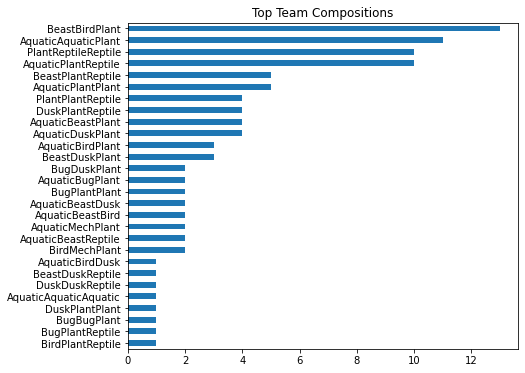

In [3]:
# Create a copy of the data frame
df_comp = df.copy()

# Map the class values to their first letter
# df_comp["Class"] = df_comp["Class"].map(lambda x: x[0])

# Aggregate classes into class composition
sr_comp = df_comp.groupby("User_Addr")["Class"].apply(lambda x: x.sum())

# Convert series to dataframe
df_comp = pd.DataFrame(sr_comp)
df_comp = df_comp.reset_index()
df_comp["Class"] = df_comp["Class"].map(lambda x: ''.join(sorted(re.findall('[A-Z][^A-Z]*', x))))

# Show plot
plt.figure(figsize=(7, 6))
df_comp["Class"].value_counts()[::-1].plot.barh(title="Top Team Compositions")

# Top Cards Per Class

In [4]:
def top_card(df, cls):
  fig, axes = plt.subplots(2, 2, figsize=(20, 10))

  df_class = df[df["Class"] == cls]
  df_class["Back"].value_counts()[::-1].plot.barh(title="Back (" + cls + ")", ax=axes[0,0])
  df_class["Mouth"].value_counts()[::-1].plot.barh(title="Mouth (" + cls + ")", ax=axes[0,1])
  df_class["Horn"].value_counts()[::-1].plot.barh(title="Horn (" + cls + ")", ax=axes[1,0])
  df_class["Tail"].value_counts()[::-1].plot.barh(title="Tail (" + cls + ")", ax=axes[1,1])

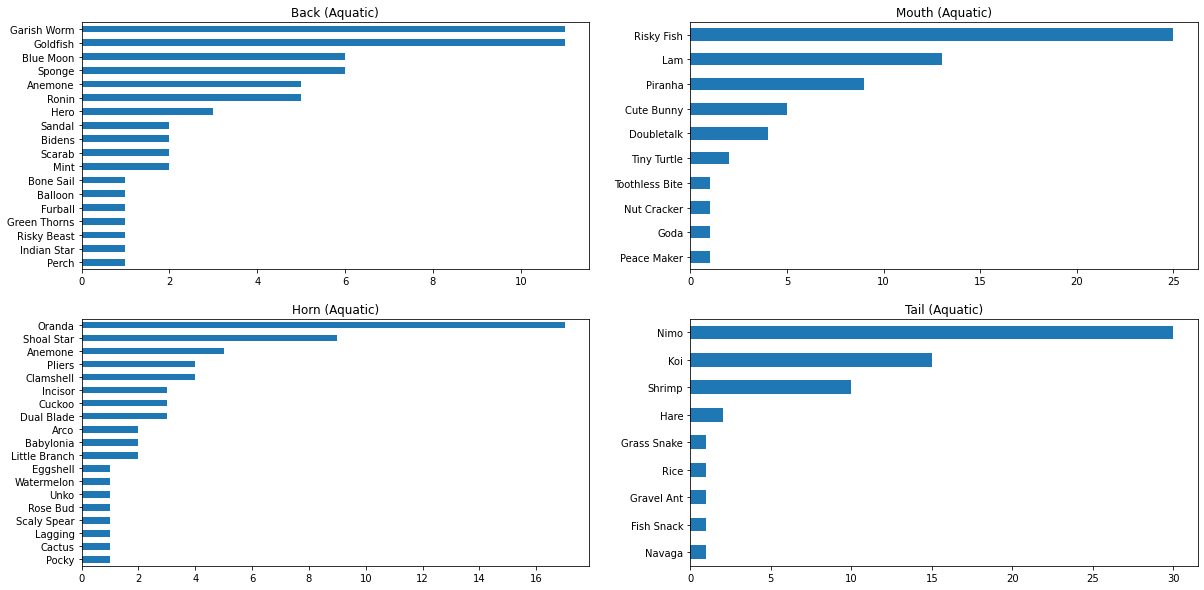

In [5]:
top_card(df, "Aquatic")

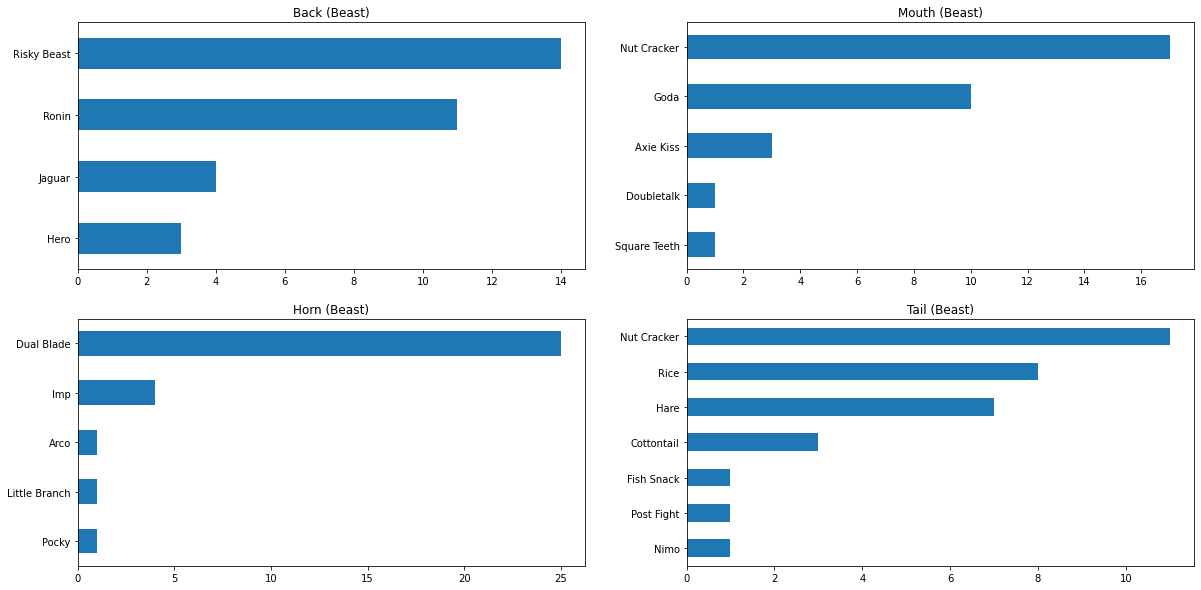

In [6]:
top_card(df, "Beast")

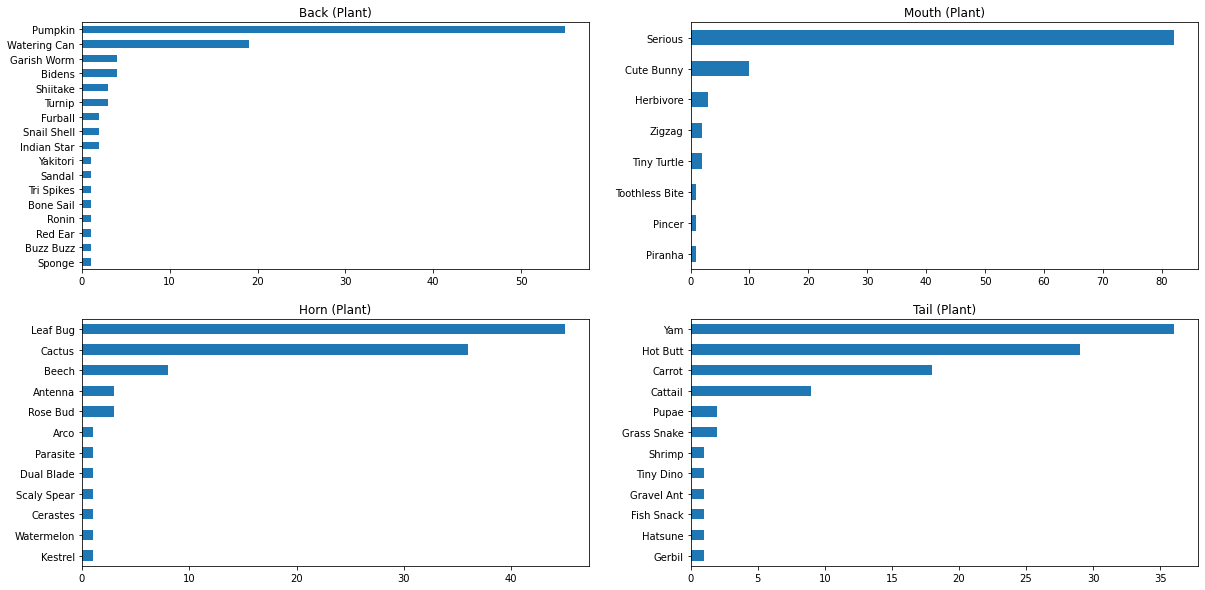

In [7]:
top_card(df, "Plant")

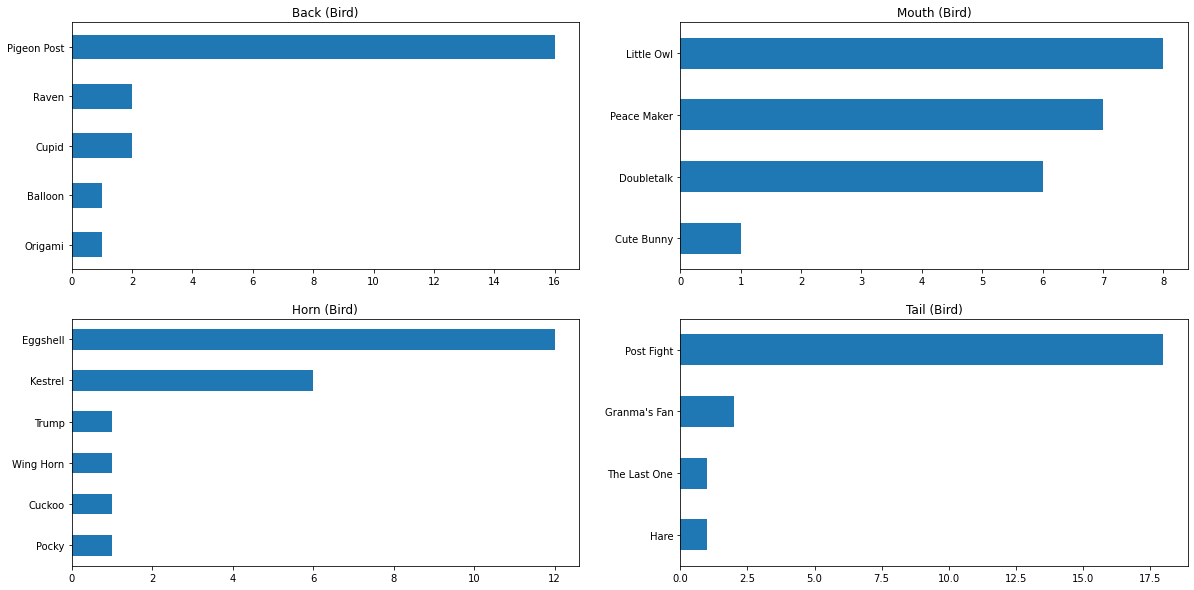

In [8]:
top_card(df, "Bird")

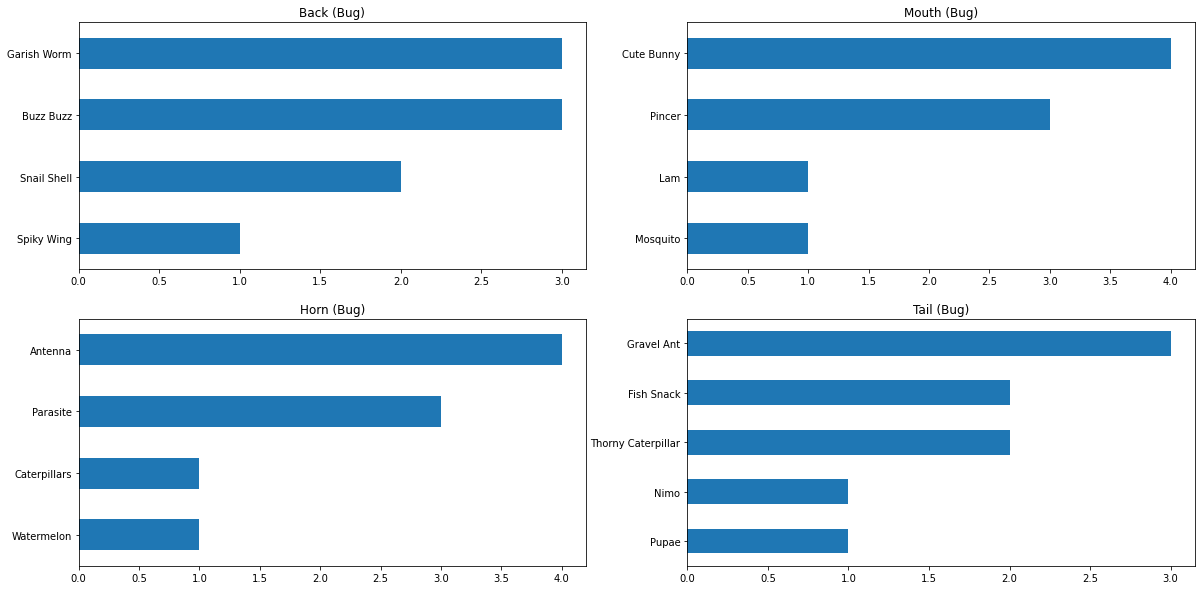

In [9]:
top_card(df, "Bug")

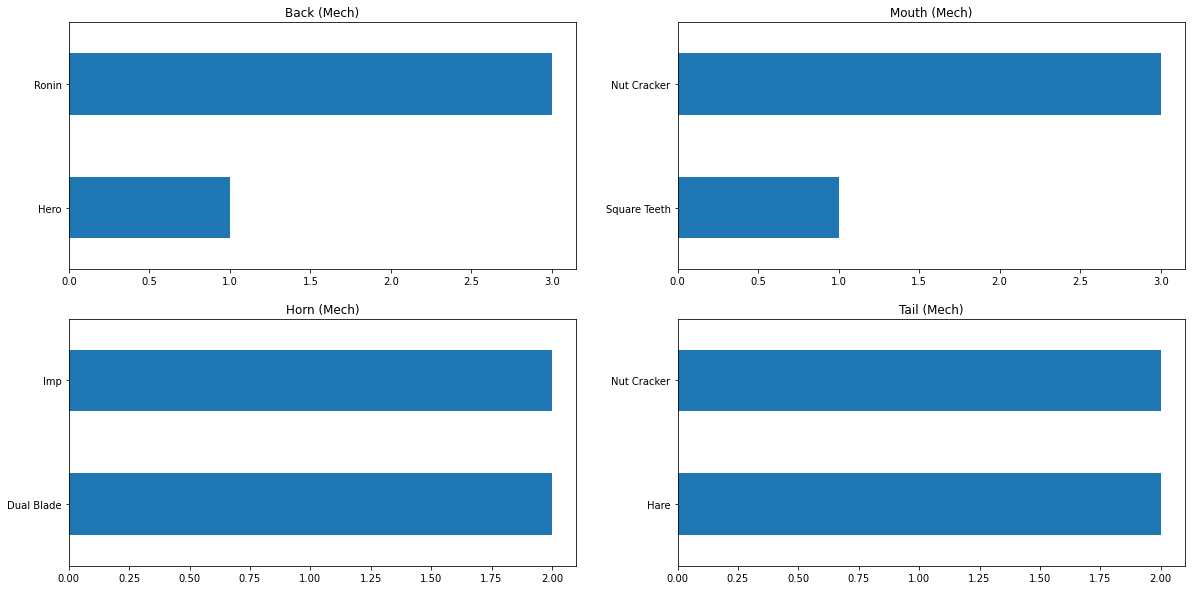

In [10]:
top_card(df, "Mech")

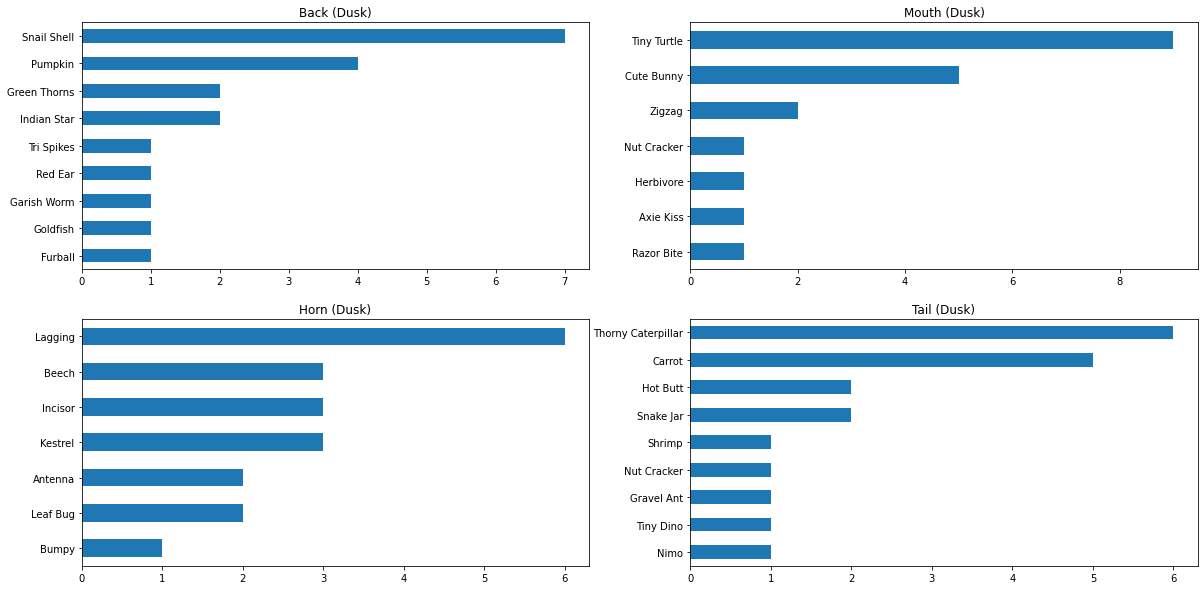

In [11]:
top_card(df, "Dusk")

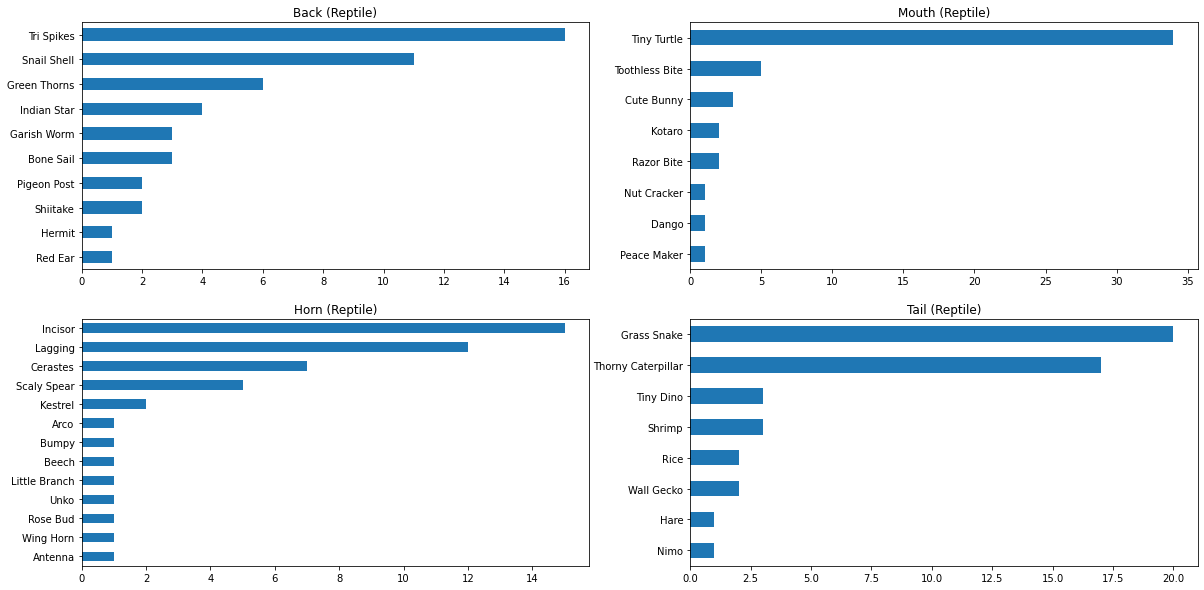

In [12]:
top_card(df, "Reptile")

# Top Combos

In [13]:
def visualize_combo(df, cls):
  fig, axes = plt.subplots(3, 2, figsize=(22, 15))

  df[df["Class"] == cls]["Back-Mouth"].value_counts()[5::-1].plot.barh(title="Back-Mouth (" + cls + ")", ax=axes[0,0])
  df[df["Class"] == cls]["Back-Horn"].value_counts()[5::-1].plot.barh(title="Back-Horn (" + cls + ")", ax=axes[0,1])
  df[df["Class"] == cls]["Back-Tail"].value_counts()[5::-1].plot.barh(title="Back-Tail (" + cls + ")", ax=axes[1,0])
  df[df["Class"] == cls]["Mouth-Horn"].value_counts()[5::-1].plot.barh(title="Mouth-Horn (" + cls + ")", ax=axes[1,1])
  df[df["Class"] == cls]["Mouth-Tail"].value_counts()[5::-1].plot.barh(title="Mouth-Tail (" + cls + ")", ax=axes[2,0])
  df[df["Class"] == cls]["Horn-Tail"].value_counts()[5::-1].plot.barh(title="Horn-Tail (" + cls + ")", ax=axes[2,1])

In [14]:
ability_cols = ["Back", "Mouth", "Horn", "Tail"]

def generate_card_pairs(row):
  for i in range(len(ability_cols)):
    for j in range(i + 1, len(ability_cols)):
      row[ability_cols[i] + "-" + ability_cols[j]] = row[ability_cols[i]] + " / " + row[ability_cols[j]]
  return row

def card_pairs(df):
  df = df.apply(generate_card_pairs, axis=1)
  df = df.drop(["Eyes", "Ears", "Back", "Mouth", "Horn", "Tail"], axis=1)
  return df

df_pairs = card_pairs(df)

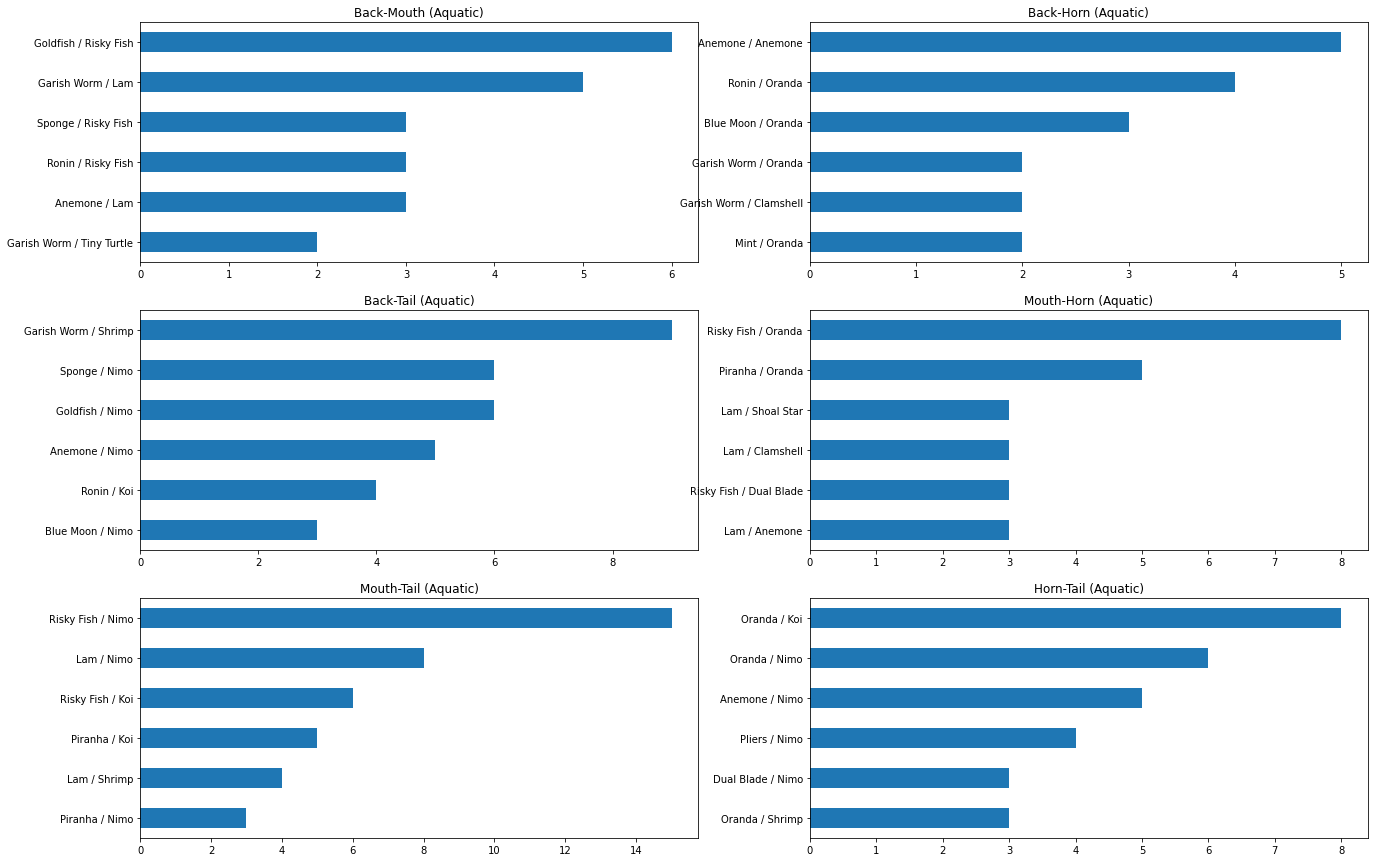

In [15]:
visualize_combo(df_pairs, "Aquatic")

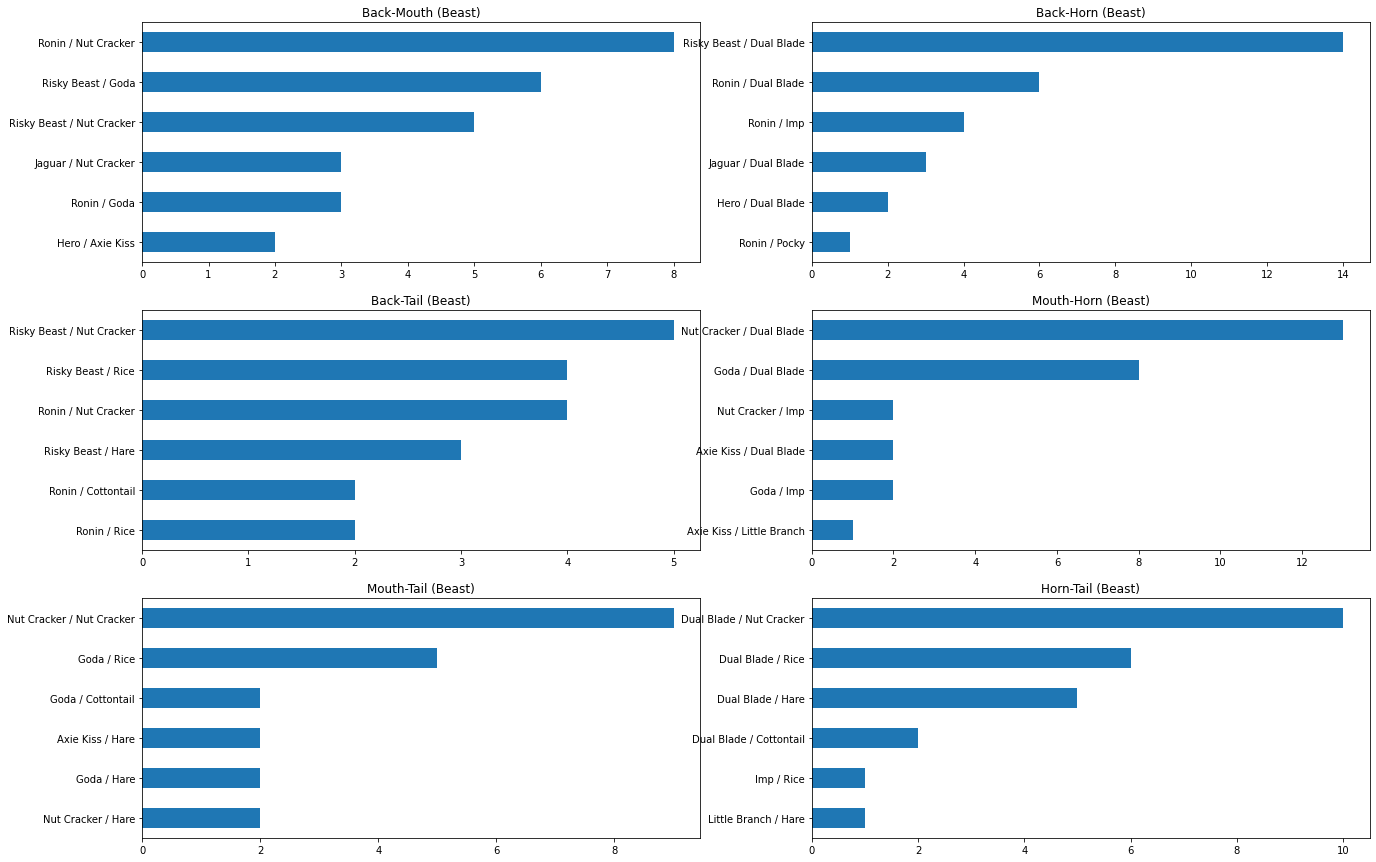

In [16]:
visualize_combo(df_pairs, "Beast")

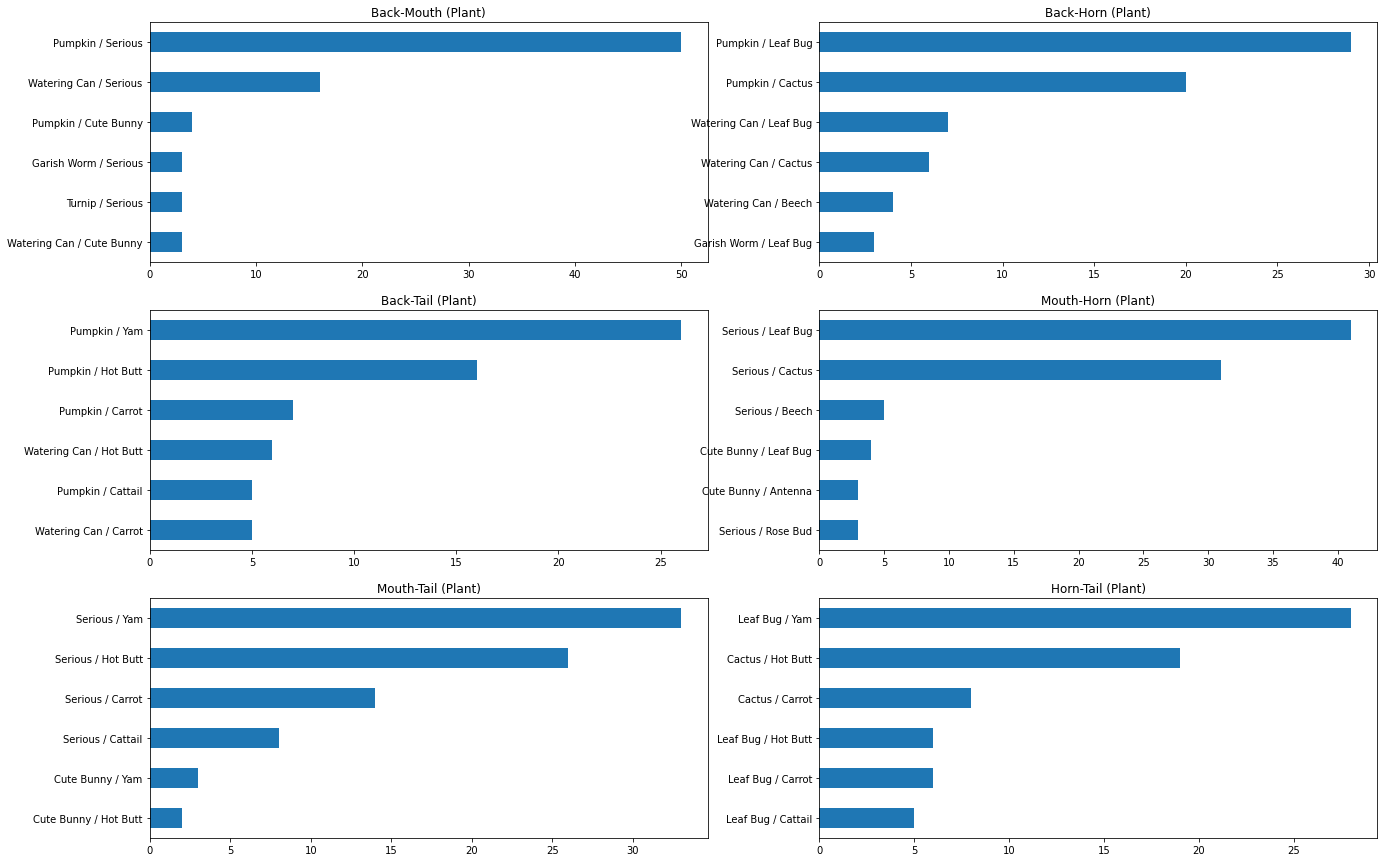

In [17]:
visualize_combo(df_pairs, "Plant")

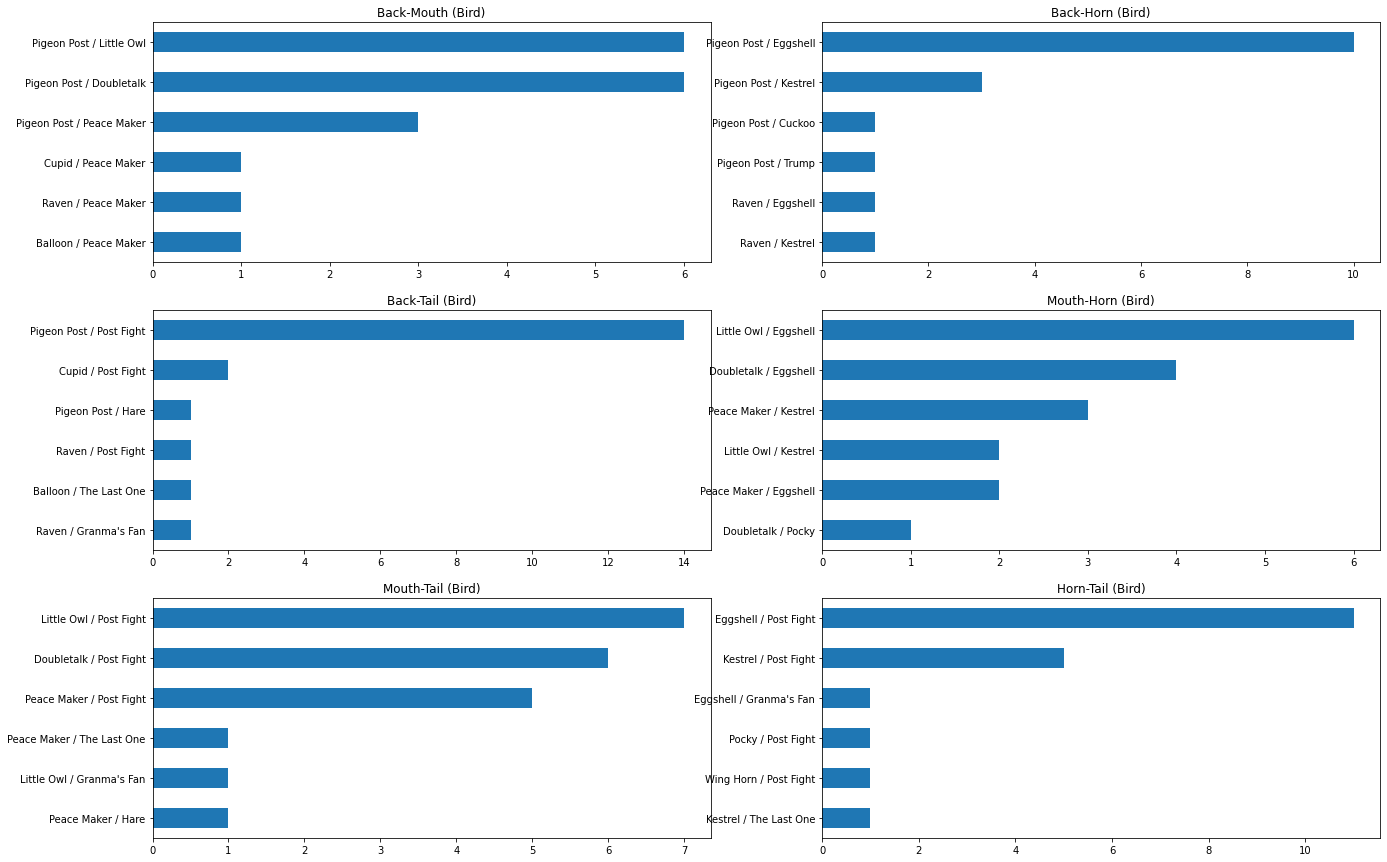

In [18]:
visualize_combo(df_pairs, "Bird")

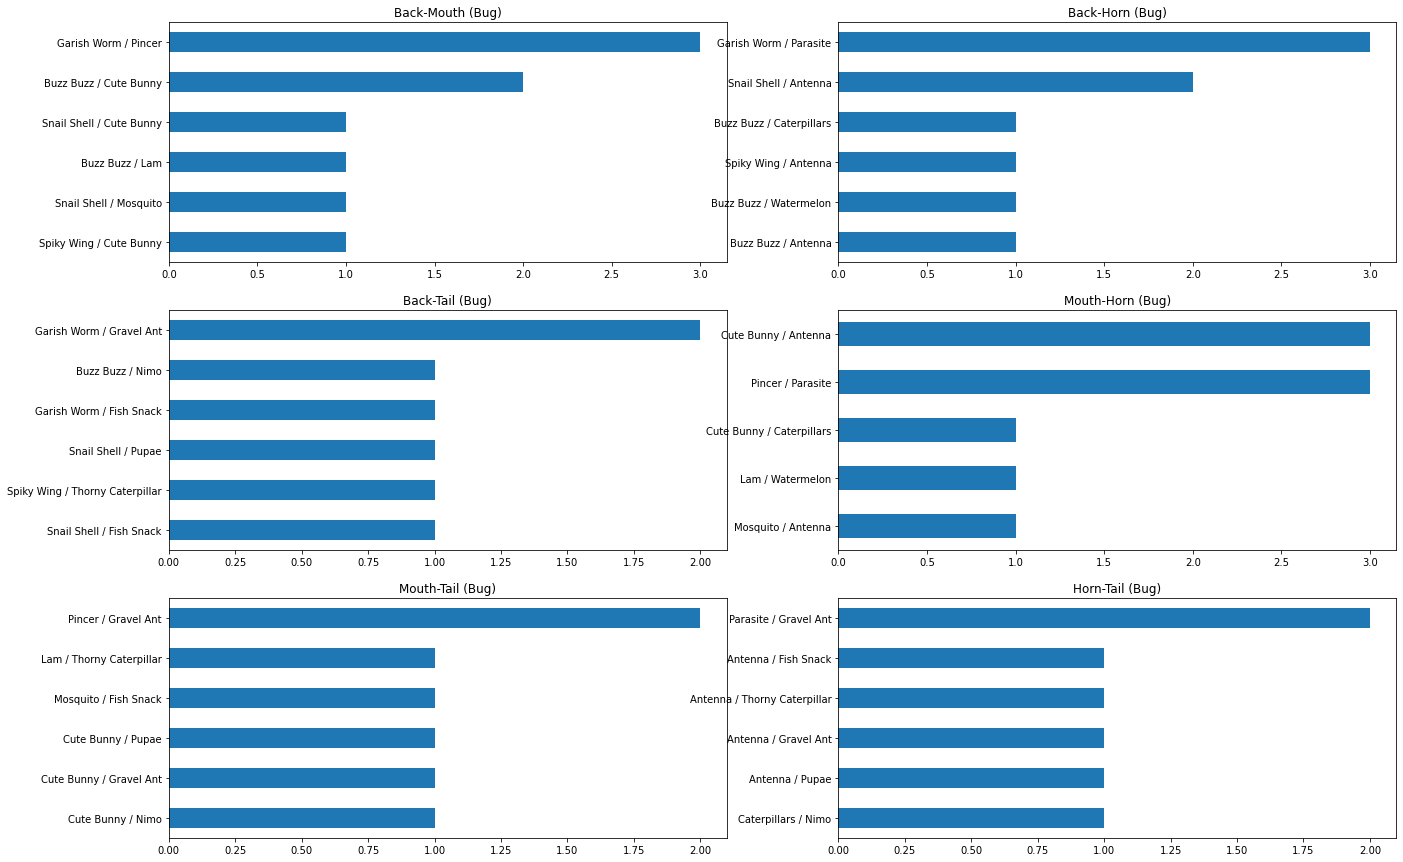

In [19]:
visualize_combo(df_pairs, "Bug")

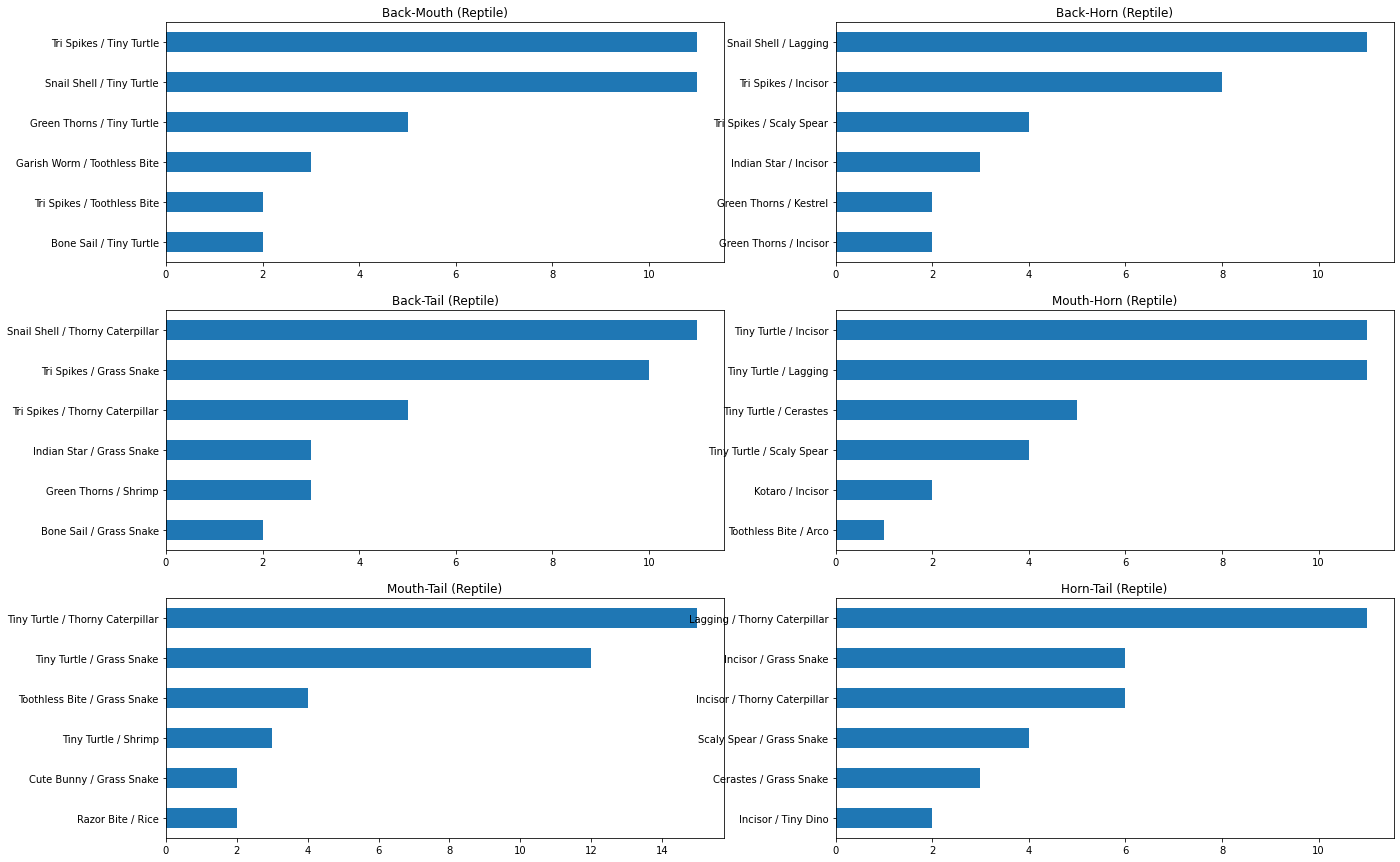

In [20]:
visualize_combo(df_pairs, "Reptile")

# Top Tri-Combo

In [21]:
def visualize_combo(df, cls):
  fig, axes = plt.subplots(2, 2, figsize=(22, 10))

  df[df["Class"] == cls]["Back-Mouth-Horn"].value_counts()[5::-1].plot.barh(title="Back-Mouth-Horn (" + cls + ")", ax=axes[0,0])
  df[df["Class"] == cls]["Back-Mouth-Tail"].value_counts()[5::-1].plot.barh(title="Back-Mouth-Tail (" + cls + ")", ax=axes[0,1])
  df[df["Class"] == cls]["Back-Horn-Tail"].value_counts()[5::-1].plot.barh(title="Back-Horn-Tail (" + cls + ")", ax=axes[1,0])
  df[df["Class"] == cls]["Mouth-Horn-Tail"].value_counts()[5::-1].plot.barh(title="Mouth-Horn-Tail (" + cls + ")", ax=axes[1,1])

In [22]:
ability_cols = ["Back", "Mouth", "Horn", "Tail"]

def generate_card_combo(row):
  for i in range(len(ability_cols)):
    for j in range(i + 1, len(ability_cols)):
      for k in range(j + 1, len(ability_cols)):
        new_col = ability_cols[i] + "-" + ability_cols[j] + "-" + ability_cols[k]
        row[new_col] = row[ability_cols[i]] + " / " + row[ability_cols[j]] + " / " + row[ability_cols[k]]
  return row

def card_combo(df):
  df = df.apply(generate_card_combo, axis=1)
  df = df.drop(["Eyes", "Ears", "Back", "Mouth", "Horn", "Tail"], axis=1)
  return df

df_combo = card_combo(df)

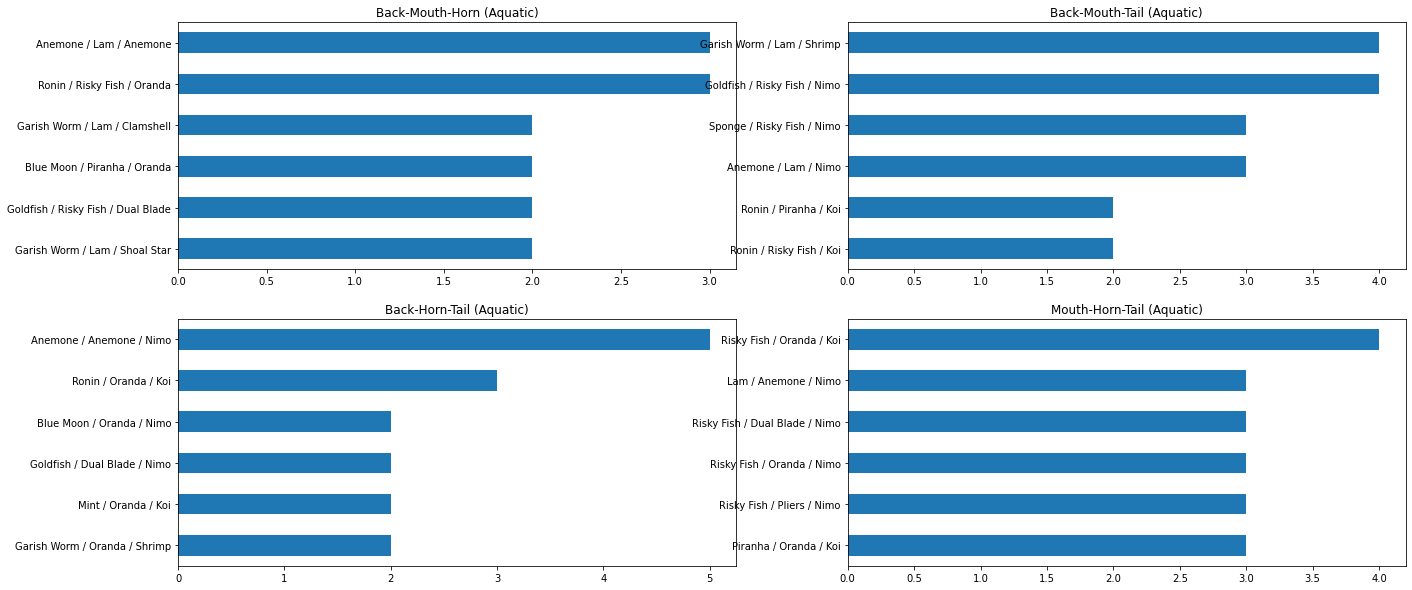

In [23]:
visualize_combo(df_combo, "Aquatic")

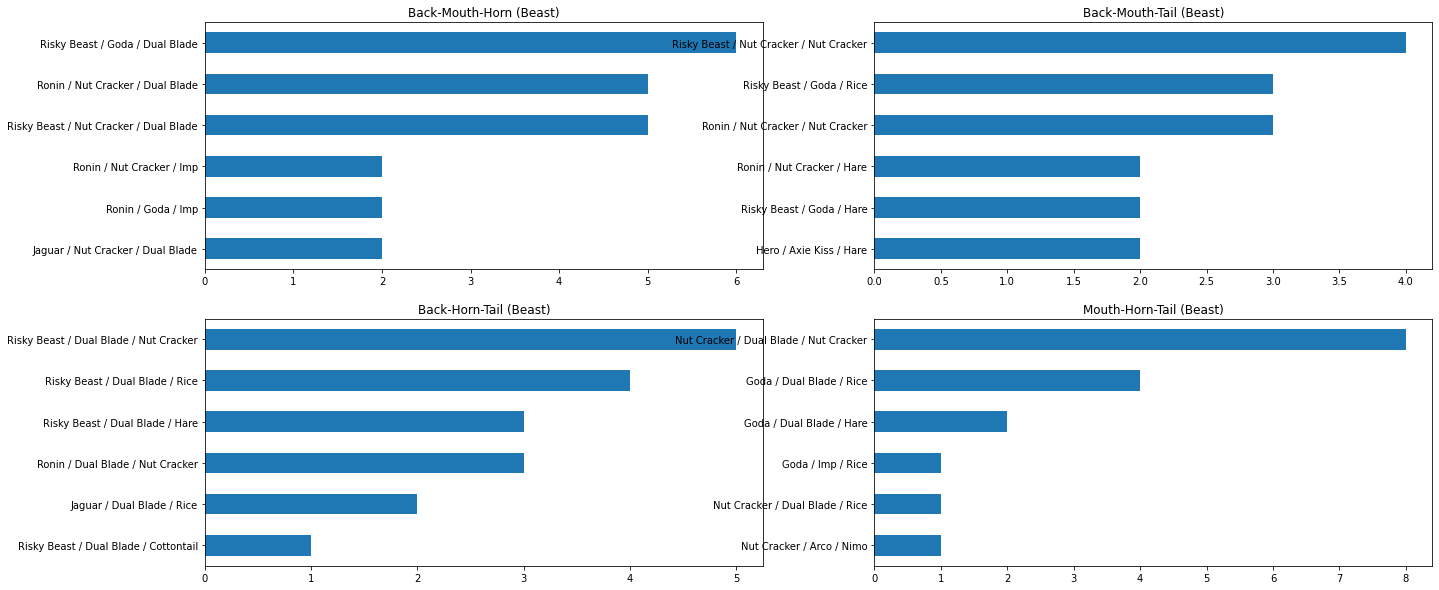

In [24]:
visualize_combo(df_combo, "Beast")

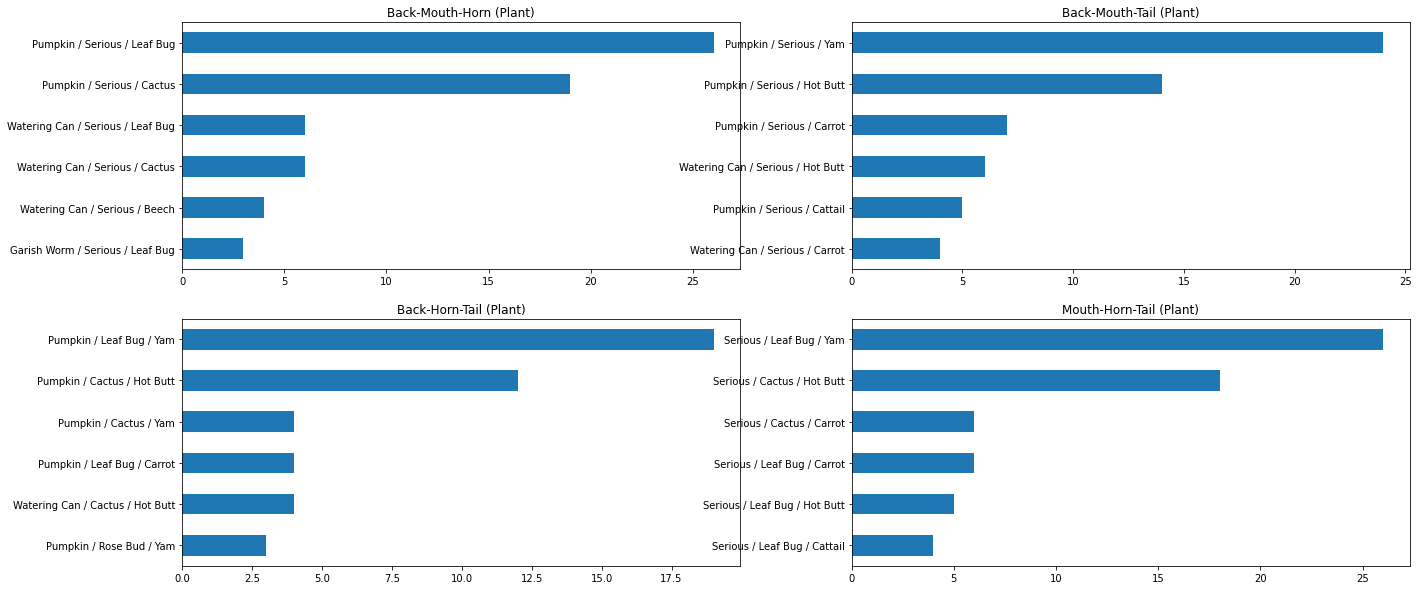

In [25]:
visualize_combo(df_combo, "Plant")

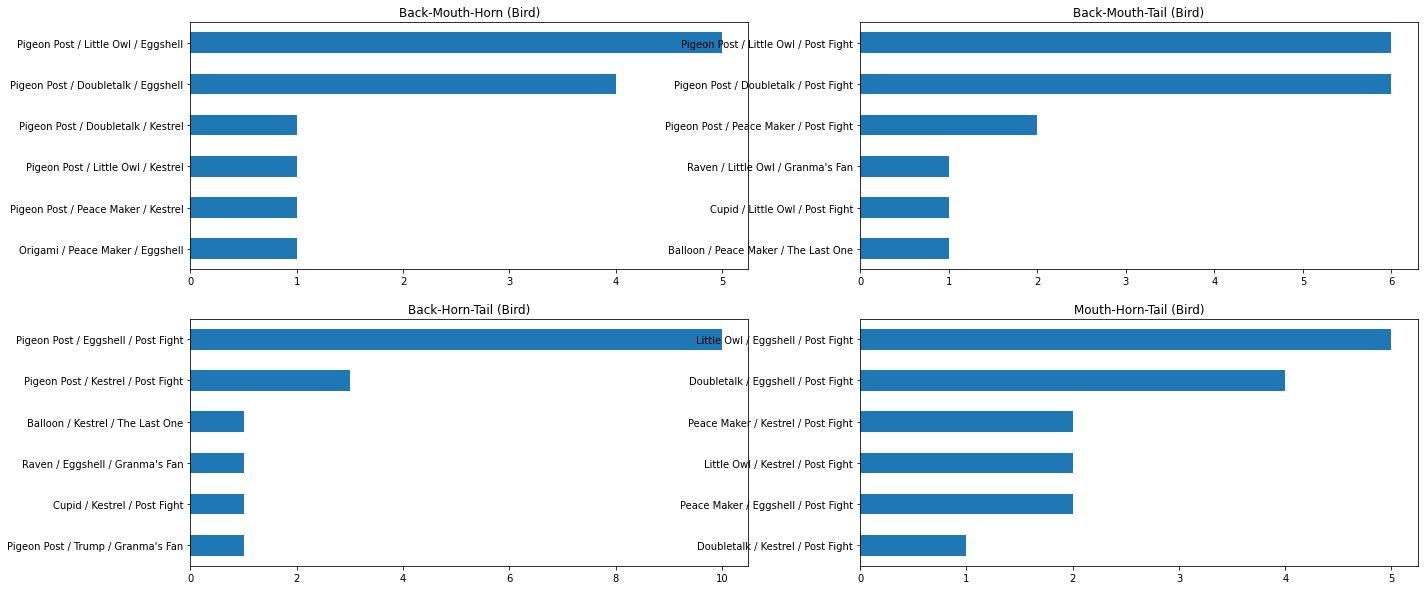

In [26]:
visualize_combo(df_combo, "Bird")

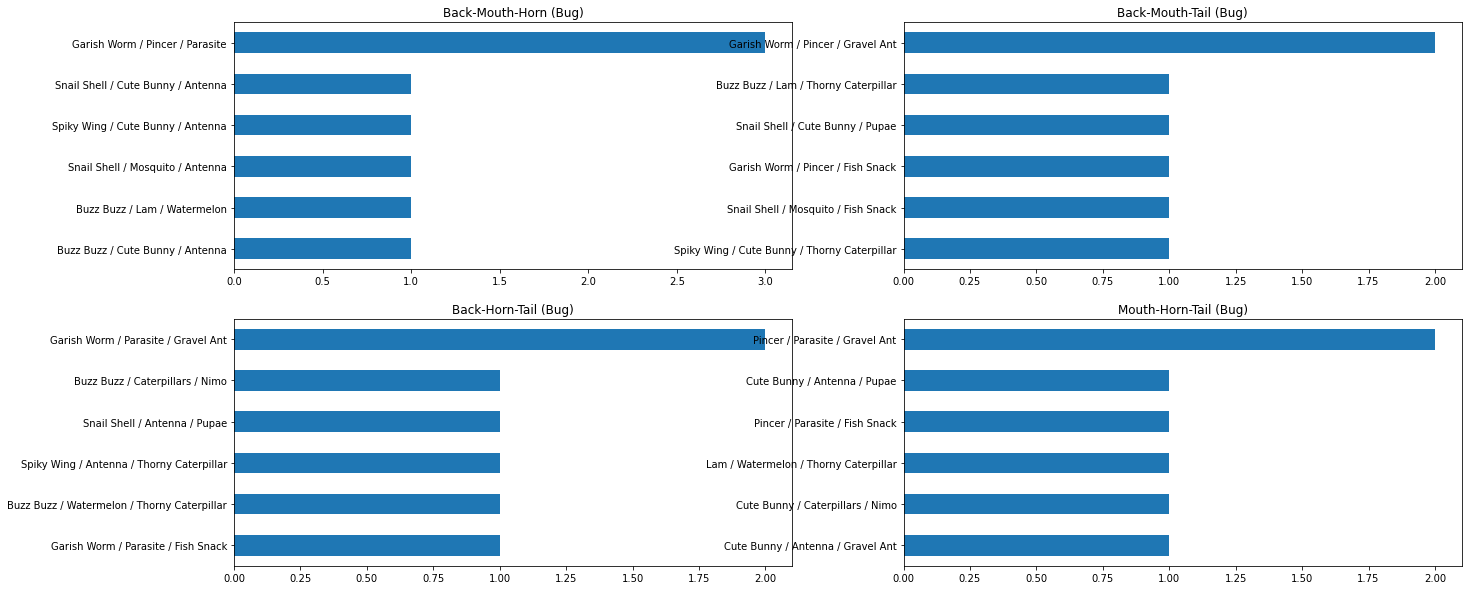

In [27]:
visualize_combo(df_combo, "Bug")

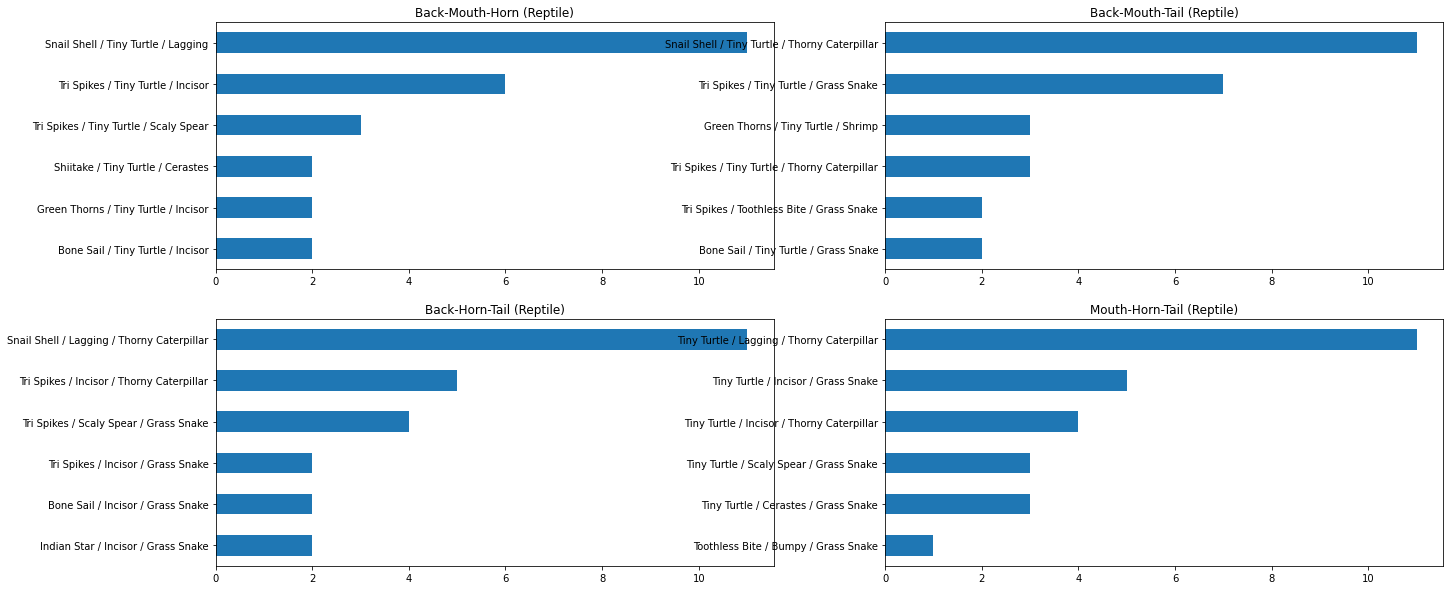

In [28]:
visualize_combo(df_combo, "Reptile")

# Top Build

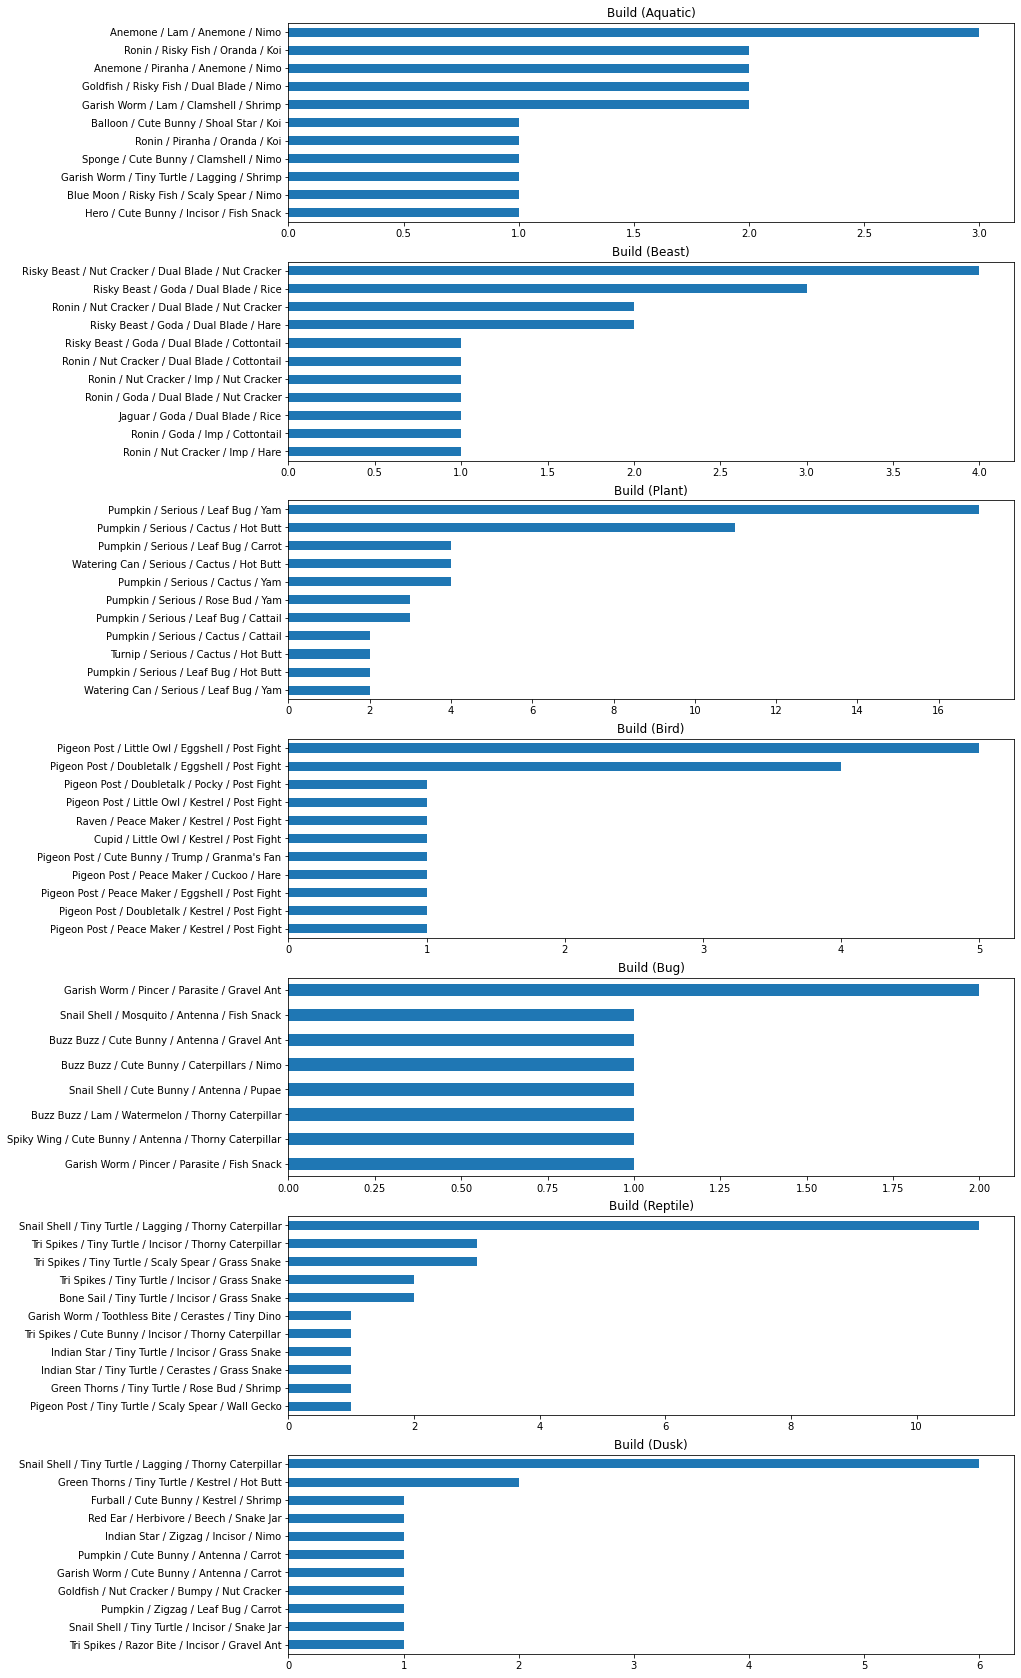

In [29]:
def visualize_build(df):
  fig, axes = plt.subplots(7, 1, figsize=(13, 30))

  df[df["Class"] == "Aquatic"]["Build"].value_counts()[10::-1].plot.barh(title="Build (Aquatic)", ax=axes[0])
  df[df["Class"] == "Beast"]["Build"].value_counts()[10::-1].plot.barh(title="Build (Beast)", ax=axes[1])
  df[df["Class"] == "Plant"]["Build"].value_counts()[10::-1].plot.barh(title="Build (Plant)", ax=axes[2])
  df[df["Class"] == "Bird"]["Build"].value_counts()[10::-1].plot.barh(title="Build (Bird)", ax=axes[3])
  df[df["Class"] == "Bug"]["Build"].value_counts()[10::-1].plot.barh(title="Build (Bug)", ax=axes[4])
  df[df["Class"] == "Reptile"]["Build"].value_counts()[10::-1].plot.barh(title="Build (Reptile)", ax=axes[5])
  df[df["Class"] == "Dusk"]["Build"].value_counts()[10::-1].plot.barh(title="Build (Dusk)", ax=axes[6])

def generate_card_build(row):
  row["Build"] = row["Back"] + " / " + row["Mouth"] + " / " + row["Horn"] + " / " + row["Tail"]
  return row

def card_build(df):
  df = df.apply(generate_card_build, axis=1)
  df = df.drop(["Eyes", "Ears", "Back", "Mouth", "Horn", "Tail"], axis=1)
  return df

df_build = card_build(df)
visualize_build(df_build)

# Build Winrate

In [30]:
def visualize_winrate_by_build(df, cls):
  plt.figure(figsize=(10, 6))
  df[df["Class"] == cls].groupby("Build")["Winrate"].mean().sort_values(ascending=False)[20::-1].plot.barh(title=cls)

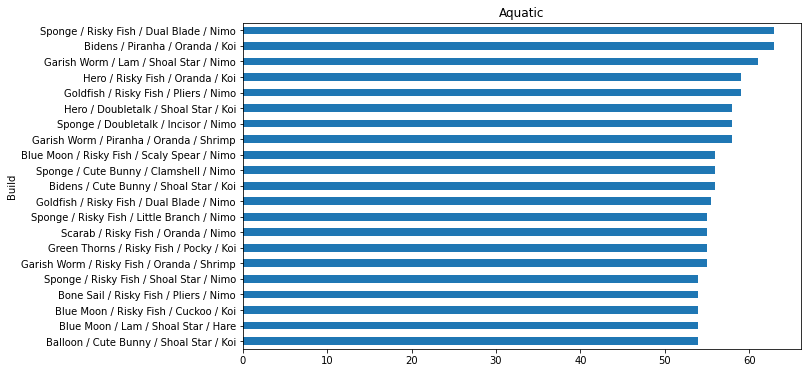

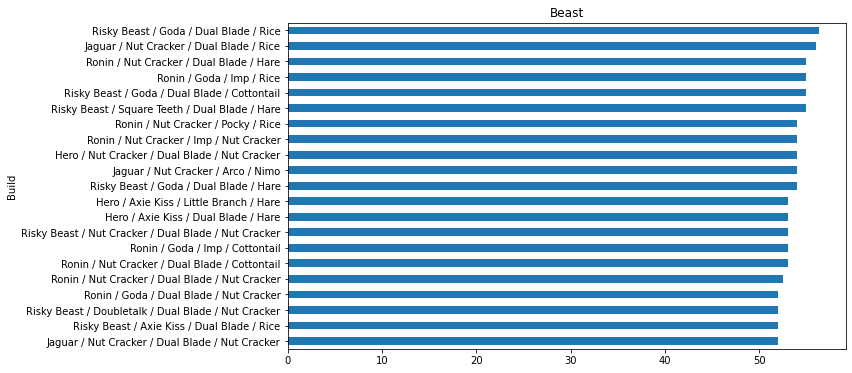

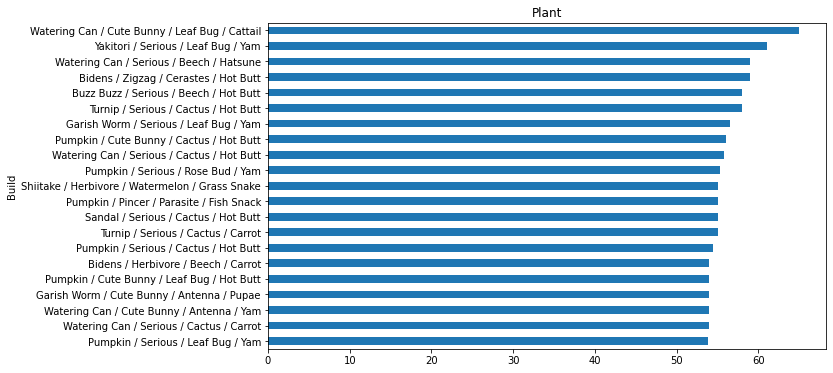

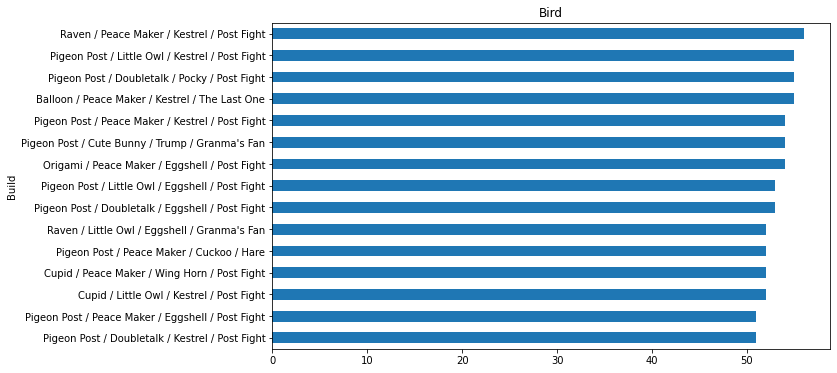

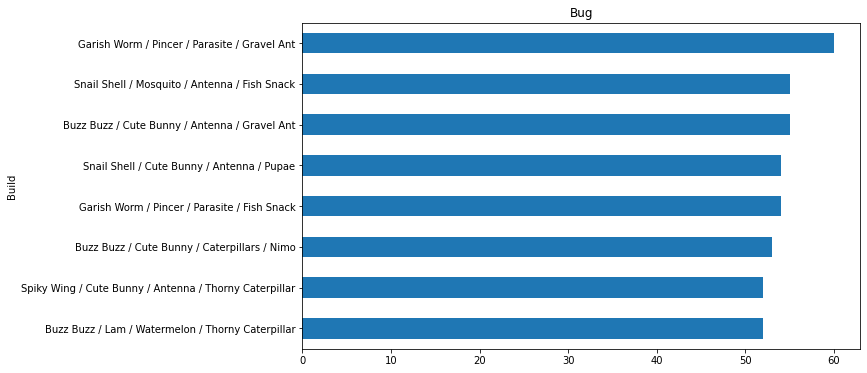

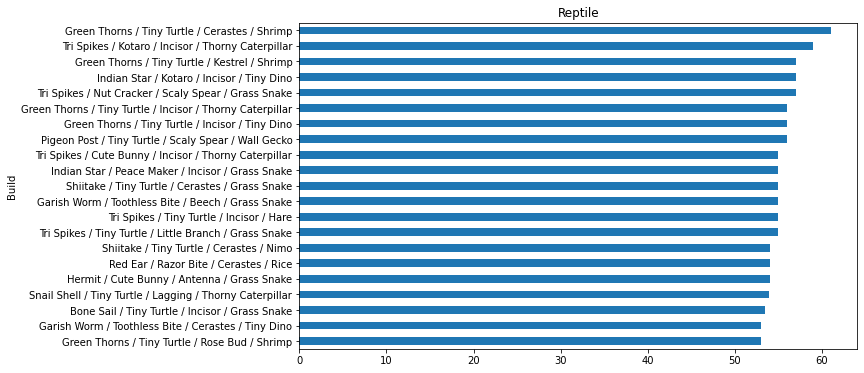

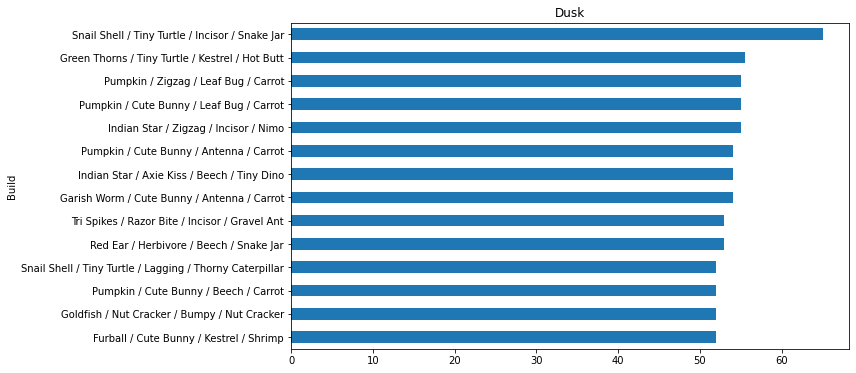

In [31]:
visualize_winrate_by_build(df_build, "Aquatic")
visualize_winrate_by_build(df_build, "Beast")
visualize_winrate_by_build(df_build, "Plant")
visualize_winrate_by_build(df_build, "Bird")
visualize_winrate_by_build(df_build, "Bug")
visualize_winrate_by_build(df_build, "Reptile")
visualize_winrate_by_build(df_build, "Dusk")

In [56]:
df_test = df_build.copy()

wr = df_test.groupby("Build", as_index=False)["Winrate"].mean()
wr = wr.rename(columns={'Winrate': 'Avg_Winrate'})

df_test = df_test["Build"].value_counts().rename_axis('Build').reset_index(name='counts')
df_test = pd.merge(df_test, wr, on="Build")

df_popular_high_wr = df_test[df_test["counts"] > 2].sort_values("Avg_Winrate", ascending=False)
df_popular_high_wr

,Build,counts,Avg_Winrate
10,Risky Beast / Goda / Dual Blade / Rice,3,56.333333
5,Watering Can / Serious / Cactus / Hot Butt,4,55.750000
9,Pumpkin / Serious / Rose Bud / Yam,3,55.333333
2,Pumpkin / Serious / Cactus / Hot Butt,11,54.454545
12,Anemone / Lam / Anemone / Nimo,3,54.000000
0,Pumpkin / Serious / Leaf Bug / Yam,17,53.764706
15,Ronin / Nut Cracker / Imp / Nut Cracker,3,53.666667
13,Pumpkin / Serious / Leaf Bug / Cattail,3,53.333333
7,Pumpkin / Serious / Leaf Bug / Carrot,4,53.250000
1,Snail Shell / Tiny Turtle / Lagging / Thorny C...,17,53.235294


In [31]:
# 